In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

actas = pd.read_csv("data/actaslargo.csv").fillna(0)
actas

,Unnamed: 0,DIPUTADO_APELLIDO_Y_NOMBRE,BLOQUE,3761,3762,3763,3764,3765,3766,3767,...,3954,3955,3956,3957,3958,3959,3960,3961,3962,3963
0,1,ABDALA DE MATARAZZO Norma Amanda,FRENTE DE TODOS,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,2,ACERENZA Samanta María Celeste,FRENTE PRO,-1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,AICEGA Juan,FRENTE PRO,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0
3,4,ALLENDE Walberto Enrique,FRENTE DE TODOS,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,5,ALONSO Laura Valeria,FRENTE DE TODOS,1.0,0.0,1.0,0.0,-1.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829,830,YACOBITTI Emiliano Benjamin,UCR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0
830,831,YAMBRUN Liliana,FRENTE DE TODOS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
831,832,YUTROVIC Ines Carolina,FRENTE DE TODOS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
832,833,ZUVIC Mariana,COALICION CIVICA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0


In [2]:
M = actas.iloc[:, 3:100].to_numpy()
# normalizo CADA diputado (fila)
# M /= M.sum(axis = 1)[:, np.newaxis]

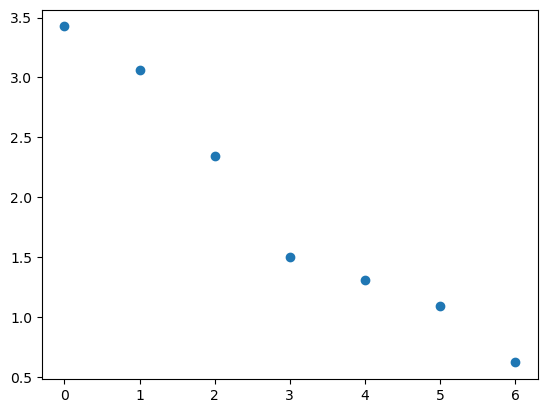

In [3]:
def scatter(M):
    if len(M.shape) == 2:
        for c in range(M.shape[1]):
            plt.scatter(np.arange(0, M.shape[0], 1), M[:, c])
    else:
        plt.scatter(np.arange(0, M.shape[0], 1), M)

U, S, Vh = np.linalg.svd(M)
scatter(np.log(S))

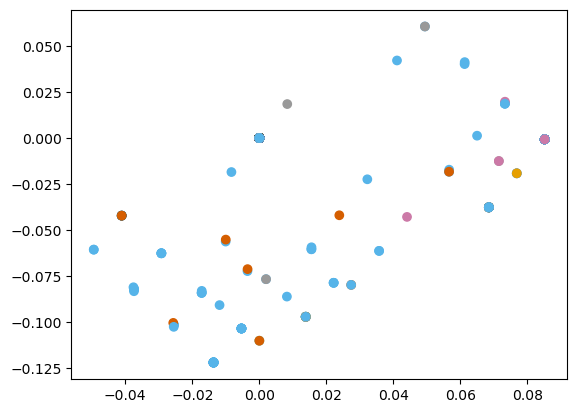

In [4]:
from matplotlib.colors import ListedColormap
colb = ListedColormap(["#56B4E9", "#F0E442", "#CC79A7", "#D55E00", "#999999", "#0072B2", "#E69F00", "red", "#009E73"])
bloques = pd.Categorical(actas.iloc[:, 2], categories=actas.iloc[:, 2].unique()).codes
plt.scatter(U[:, 0], U[:, 1], c = bloques, cmap = colb)